### Install Libraries

In [128]:
!python -m pip install --upgrade pip

In [129]:
!pip install pandas pyodbc termcolor matplotlib 
!pip install --upgrade pandas
!pip install seaborn
!pip install geopandas plotly-geo
!pip install plotly scipy

### Import Libraries

In [130]:
import pandas as pd
import numpy as np
import pyodbc
from termcolor import colored
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
from IPython.display import display
import geopandas as gpd
import plotly.express as px
from scipy import stats
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from scipy.stats import kruskal
from sklearn.linear_model import LinearRegression


In [131]:
# Set Seaborn style
sns.set_style('whitegrid')  # Example: 'whitegrid', 'darkgrid', 'ticks', etc.
plt.style.use('seaborn-v0_8-white')
# Add token for access to  plotly express charts
px.set_mapbox_access_token("pk.eyJ1IjoiemVpZHplbiIsImEiOiJjbGJwbzdreTUwN29pM3lsZXBpdXB0M2VuIn0.pqLWA1UMtBrBdWnBb1aoZQ")


### Create Connection

In [132]:
def create_connection(server, database):
    print(">> Create Connection. . .", end=" ")
    # Define the connection parameters
    server=server
    database=database 
    # Create a connection string
    conn_str = f'DRIVER=ODBC Driver 17 for SQL Server;SERVER={server};DATABASE={database};Trusted_Connection=yes;'
    try:
        # Connect to the SQL Server database
        conn = pyodbc.connect(conn_str)
        # Create a cursor
        cursor = conn.cursor()
        # Connect to the SQL Server database
        cursor.execute('SELECT 1')
        row = cursor.fetchone()
        if row:
            print(colored("Done", 'green'))
        else:
            msg="Database connection successful, but ping failed. No response from database."
            print(colored(msg,"red"))
    except pyodbc.Error as e:
        msg=f"Error connecting to database: {e}"
        print(colored(msg,"red"))
        return None
    return conn, cursor

In [133]:
def close_connection(conn):
    print(">> Close Connection. . .", end=" ")
    try:
        conn.close()
        print(colored("Done", 'green'))
    except pyodbc.Error as e:
        msg=f"Error close connecting : {e}"
        print(colored(msg,"red"))
    return 

In [134]:
conn, cursor=create_connection(
    server = 'ZAID-PC\SQLEXPRESS',
    database='AdventureWorks2022'
)

>> Create Connection. . . Done


### Project Questions

#### Q1: What are the regional sales in the best performing country?

In [135]:
# Create Query 
sql_query="""SELECT CR.Name as RegionName, SUM(ST.SalesYTD) as SalesYTD, SUM(ST.SalesLastYear) as SalesLY
FROM Sales.SalesTerritory AS ST
INNER JOIN Person.CountryRegion AS CR
ON ST.CountryRegionCode = CR.CountryRegionCode
GROUP BY CR.Name
ORDER BY SalesLY DESC;"""
# Get Data
RegionSales = pd.read_sql(sql_query, conn)

C:\Users\Zaid\AppData\Local\Temp\ipykernel_26788\3214961931.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  RegionSales = pd.read_sql(sql_query, conn)


In [136]:
display(RegionSales.head(5))

,RegionName,SalesYTD,SalesLY
0,United States,2.641106e+07,1.940250e+07
1,Canada,6.771829e+06,5.693989e+06
2,France,4.772398e+06,2.396540e+06
3,Australia,5.977815e+06,2.278549e+06
4,United Kingdom,5.012905e+06,1.635823e+06


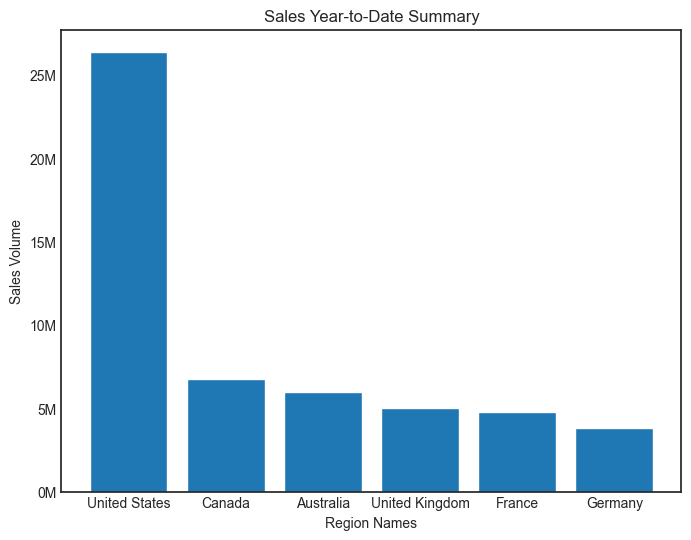

In [137]:
# Create bar plot
RegionSales=RegionSales.sort_values(by='SalesYTD', ascending=False)
plt.figure(figsize=(8, 6))  # Set the figure size (optional)
plt.bar(RegionSales["RegionName"], RegionSales["SalesYTD"])

# Format Y-axis tick labels in millions
formatter = FuncFormatter(lambda x, _: '{:,.0f}M'.format(x / 1000000))
plt.gca().yaxis.set_major_formatter(formatter)

# Add title and labels
plt.title('Sales Year-to-Date Summary')
plt.xlabel('Region Names')
plt.ylabel('Sales Volume')
# Show plot
plt.show()

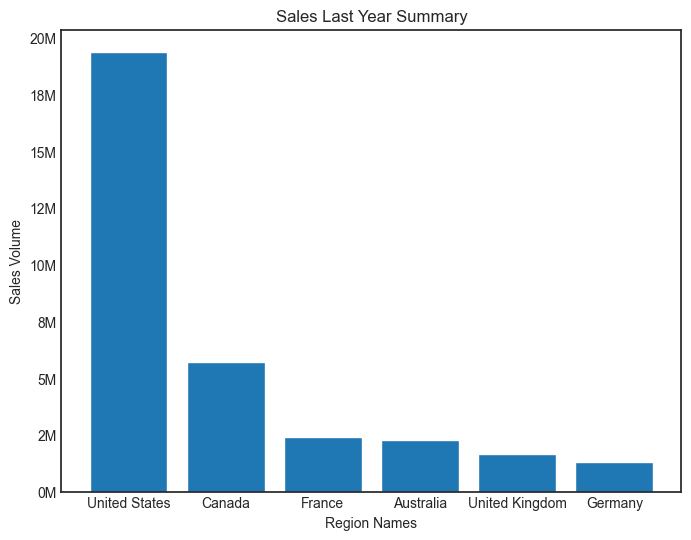

In [138]:
# Sort Data
RegionSales=RegionSales.sort_values(by='SalesLY', ascending=False)
# Create bar plot
plt.figure(figsize=(8, 6))  # Set the figure size (optional)
plt.bar(RegionSales["RegionName"], RegionSales["SalesLY"])

# Format Y-axis tick labels in millions
formatter = FuncFormatter(lambda x, _: '{:,.0f}M'.format(x / 1000000))
plt.gca().yaxis.set_major_formatter(formatter)

# Add title and labels
plt.title('Sales Last Year Summary')
plt.xlabel('Region Names')
plt.ylabel('Sales Volume')
# Show plot
plt.show()

In [139]:

# Create Query 
sql_query="""SELECT ST.Name as TerritoryName, ST.SalesYTD as SalesYTD, ST.SalesLastYear as SalesLY
FROM Sales.SalesTerritory AS ST
INNER JOIN Person.CountryRegion AS CR
ON ST.CountryRegionCode = CR.CountryRegionCode
Where ST.CountryRegionCode='US'
ORDER BY SalesLY DESC;
"""
# Get Data
TerritorySales = pd.read_sql(sql_query, conn)


C:\Users\Zaid\AppData\Local\Temp\ipykernel_26788\1618121251.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  TerritorySales = pd.read_sql(sql_query, conn)


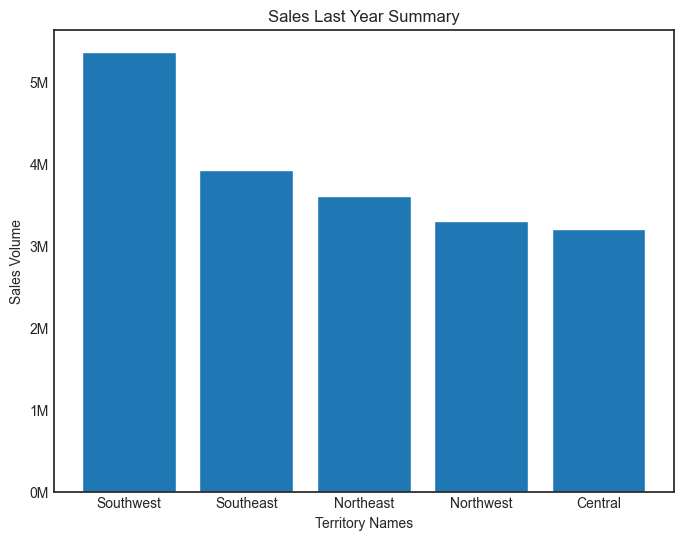

In [140]:
# Sort Data
TerritorySales=TerritorySales.sort_values(by='SalesLY', ascending=False)
# Create bar plot
plt.figure(figsize=(8, 6))  # Set the figure size (optional)
plt.bar(TerritorySales["TerritoryName"], TerritorySales["SalesLY"])

# Format Y-axis tick labels in millions
formatter = FuncFormatter(lambda x, _: '{:,.0f}M'.format(x / 1000000))
plt.gca().yaxis.set_major_formatter(formatter)

# Add title and labels
plt.title('Sales Last Year Summary')
plt.xlabel('Territory Names')
plt.ylabel('Sales Volume')
# Show plot
plt.show()

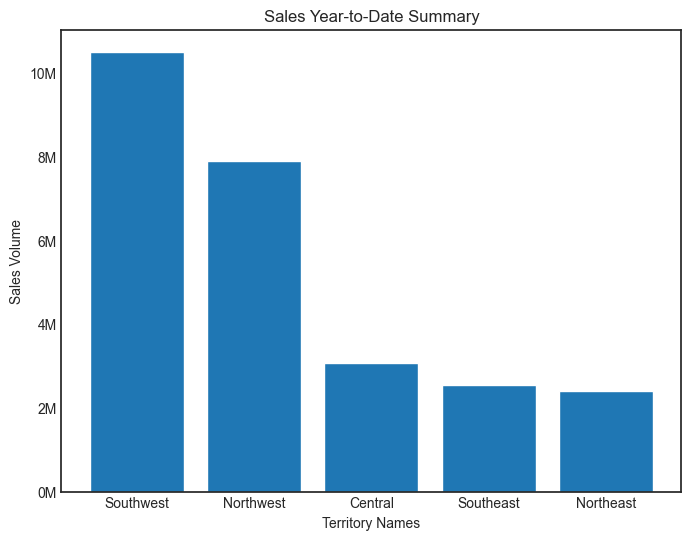

In [141]:
# Sort Data
TerritorySales=TerritorySales.sort_values(by='SalesYTD', ascending=False)
# Create bar plot
plt.figure(figsize=(8, 6))  # Set the figure size (optional)
plt.bar(TerritorySales["TerritoryName"], TerritorySales["SalesYTD"])

# Format Y-axis tick labels in millions
formatter = FuncFormatter(lambda x, _: '{:,.0f}M'.format(x / 1000000))
plt.gca().yaxis.set_major_formatter(formatter)

# Add title and labels
plt.title('Sales Year-to-Date Summary')
plt.xlabel('Territory Names')
plt.ylabel('Sales Volume')
# Show plot
plt.show()

#### Q2: What is the relationship between annual leave taken and bonus?

In [142]:
# Create Query 
sql_query="""SELECT HRE.BusinessEntityID, 
		HRE.VacationHours, 
		HRE.SickLeaveHours, 
		HRE.VacationHours + HRE.SickLeaveHours as annual_leave,
		Bonus
FROM HumanResources.Employee HRE
INNER JOIN Sales.SalesPerson SSP ON SSP.BusinessEntityID=HRE.BusinessEntityID
ORDER BY HRE.NationalIDNumber;
"""
# Get Data
SalesEmployees = pd.read_sql(sql_query, conn)


C:\Users\Zaid\AppData\Local\Temp\ipykernel_26788\2962100527.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  SalesEmployees = pd.read_sql(sql_query, conn)


In [143]:
SalesEmployees.head()

,BusinessEntityID,VacationHours,SickLeaveHours,annual_leave,Bonus
0,290,34,37,71,985.0
1,281,26,33,59,3550.0
2,276,27,33,60,2000.0
3,278,33,36,69,500.0
4,282,31,35,66,5000.0


In [144]:

# Calculate Pearson correlation coefficient
correlation_coefficient = np.corrcoef(SalesEmployees["annual_leave"], SalesEmployees["Bonus"])[0, 1]
print("Pearson correlation coefficient: ",colored(f"{correlation_coefficient}", "yellow"))


Pearson correlation coefficient:  0.3830263167724213


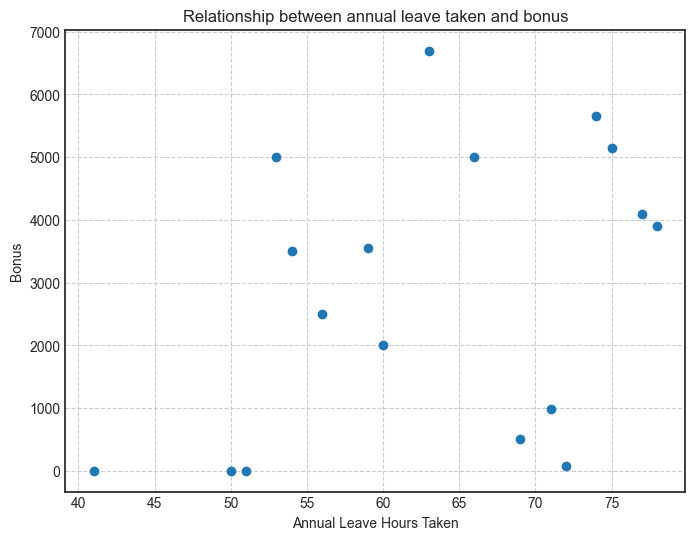

In [145]:
# Scatter plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(SalesEmployees["annual_leave"], SalesEmployees["Bonus"])
plt.xlabel('Annual Leave Hours Taken')
plt.ylabel('Bonus')
plt.title('Relationship between annual leave taken and bonus')
ax.grid(True, linestyle='--', linewidth=0.8)
plt.show()

#### Q3: What is the relationship between Country and Revenue?

In [146]:
# Create Query 
sql_query="""
SELECT 
    PCR.CountryRegionCode AS CountryRegion,
	PCR.Name as RegionName,
    YEAR(SOH.OrderDate) AS OrderYear,
    COUNT(DISTINCT SOH.SalesOrderID) AS NumberOfOrders,
    COUNT(DISTINCT C.CustomerID) AS NumberOfCustomers,
    ROUND(SUM(SSOD.UnitPrice * SSOD.OrderQty), 0) AS TotalRevenue,
	ROUND(SUM(SSOD.UnitPrice * SSOD.OrderQty) / COUNT(DISTINCT SOH.SalesOrderID), 0) AS AverageOrderValue
	                      
FROM 
    Sales.SalesOrderHeader AS SOH
INNER JOIN 
    Sales.SalesOrderDetail AS SSOD ON SOH.SalesOrderID = SSOD.SalesOrderID
INNER JOIN 
    Sales.Customer AS C ON SOH.CustomerID = C.CustomerID
INNER JOIN 
    Person.Address AS A ON C.CustomerID = A.AddressID
INNER JOIN 
    Person.StateProvince AS SP ON A.StateProvinceID = SP.StateProvinceID
INNER JOIN 
    Person.CountryRegion AS PCR ON SP.CountryRegionCode = PCR.CountryRegionCode
GROUP BY 
    PCR.CountryRegionCode, PCR.Name, YEAR(SOH.OrderDate)
ORDER BY 
	 OrderYear, TotalRevenue;
"""
# Get Data
Country_info = pd.read_sql(sql_query, conn)
Country_info['RegionName'] = Country_info['RegionName'].replace('United States', 'United States of America')

C:\Users\Zaid\AppData\Local\Temp\ipykernel_26788\4232909326.py:30: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  Country_info = pd.read_sql(sql_query, conn)


In [147]:
Country_info.head(3)

,CountryRegion,RegionName,OrderYear,NumberOfOrders,NumberOfCustomers,TotalRevenue,AverageOrderValue
0,DE,Germany,2011,135,127,797570.0,5908.0
1,CA,Canada,2011,118,107,807671.0,6845.0
2,GB,United Kingdom,2011,156,143,1121146.0,7187.0


In [148]:
pivot_table = Country_info.pivot_table(index='OrderYear', columns='RegionName', values='TotalRevenue', aggfunc='sum')
pivot_table

RegionName,Australia,Canada,France,Germany,United Kingdom,United States of America
OrderYear,,,,,,
2011,1684760.0,807671.0,1521737.0,797570.0,1121146.0,3822142.0
2012,4323989.0,2118655.0,3348059.0,2070029.0,2017259.0,9080044.0
2013,5684259.0,2532314.0,3385353.0,3246605.0,2663213.0,11981032.0
2014,2688265.0,1181724.0,1664593.0,1699026.0,1715743.0,6372844.0


In [149]:
# Perform ANOVA test
f_statistic, p_value = stats.f_oneway(
    pivot_table["United States of America"], 
    pivot_table["United Kingdom"], 
    pivot_table["France"],
    pivot_table["Canada"],
    pivot_table["Australia"])
# Print results
print("F-Statistic:", colored(f_statistic,'green') )
print("P-Value:", colored(p_value,'green') )
# Interpret results
if p_value < 0.05:
    print("There is a statistically significant difference in revenue between countries.")
else:
    print("There is no statistically significant difference in revenue between countries.")

F-Statistic: 7.311706001704248
P-Value: 0.0017849608108991804
There is a statistically significant difference in revenue between countries.


The F-statistic value of 7.3117 indicates that there is a significant difference in revenue between countries.
The p-value of 0.0018 is less than the typical significance level of 0.05 (5%). Therefore, we reject the null hypothesis and conclude that there is a statistically significant difference in revenue between countries.
In summary, based on the provided F-statistic and p-value, we have evidence to support the conclusion that there is a statistically significant difference in revenue between countries.

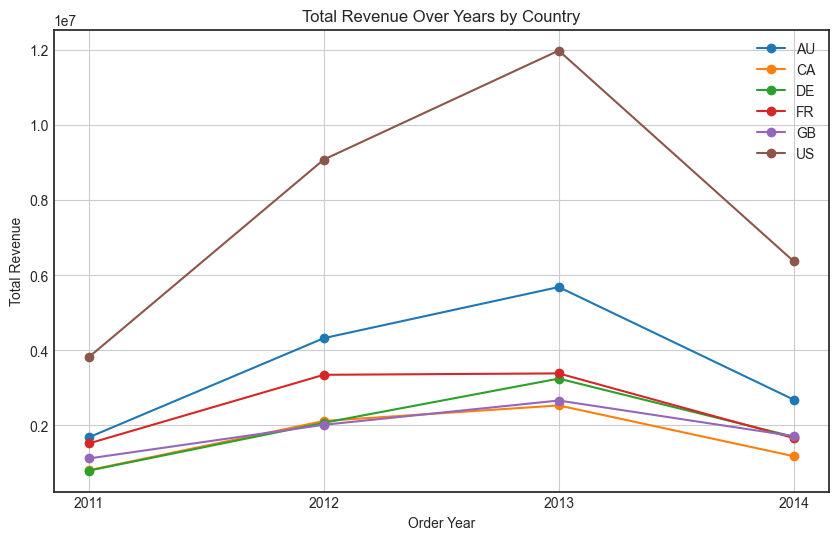

In [150]:
# Group data by 'CountryRegion'
grouped = Country_info.groupby('CountryRegion')
# Plot line chart for each country
plt.figure(figsize=(10, 6))
for country, group in grouped:
    plt.plot(group['OrderYear'], group['TotalRevenue'], marker='o', label=country)
# Set integer ticks for the x-axis
plt.xticks(np.arange(Country_info['OrderYear'].min(), Country_info['OrderYear'].max() + 1, 1))
# Add labels and title
plt.title('Total Revenue Over Years by Country')
plt.xlabel('Order Year')
plt.ylabel('Total Revenue')
plt.legend()
plt.grid(True)
plt.show()

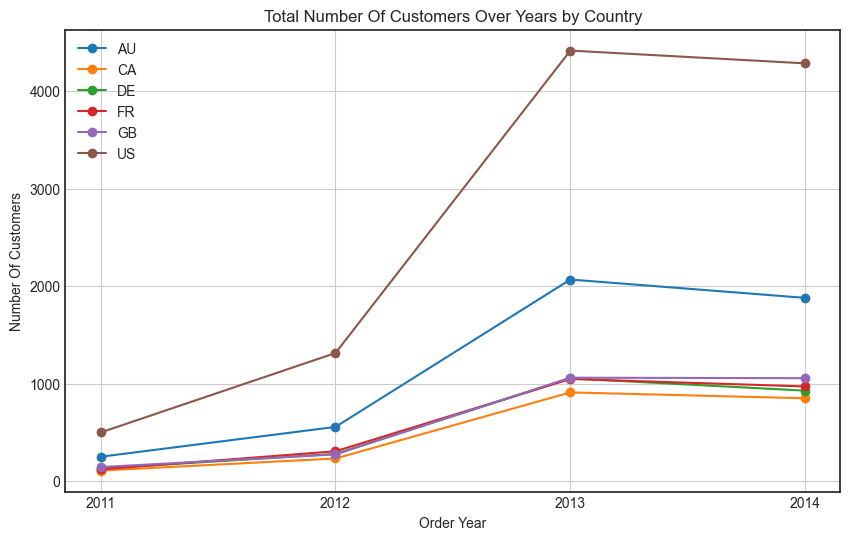

In [151]:
# Plot line chart for each country
plt.figure(figsize=(10, 6))
for country, group in grouped:
    plt.plot(group['OrderYear'], group['NumberOfCustomers'], marker='o', label=country)
# Set integer ticks for the x-axis
plt.xticks(np.arange(Country_info['OrderYear'].min(), Country_info['OrderYear'].max() + 1, 1))
# Add labels and title
plt.title('Total Number Of Customers Over Years by Country')
plt.xlabel('Order Year')
plt.ylabel('Number Of Customers')
plt.legend()
plt.grid(True)
plt.show()

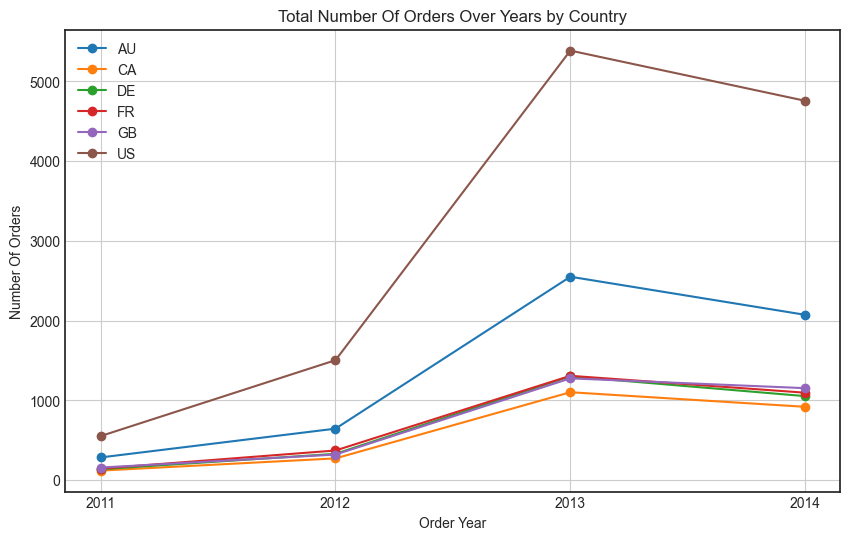

In [152]:
# Plot line chart for each country
plt.figure(figsize=(10, 6))
for country, group in grouped:
    plt.plot(group['OrderYear'], group['NumberOfOrders'], marker='o', label=country)
# Set integer ticks for the x-axis
plt.xticks(np.arange(Country_info['OrderYear'].min(), Country_info['OrderYear'].max() + 1, 1))
# Add labels and title
plt.title('Total Number Of Orders Over Years by Country')
plt.xlabel('Order Year')
plt.ylabel('Number Of Orders')
plt.legend()
plt.grid(True)
plt.show()

In [153]:
# Load the world shapefile
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
grouped = Country_info.groupby('RegionName').sum()
# Merge the world shapefile with your results DataFrame
merged_data = world.merge(grouped, how='left', left_on='name', right_on='RegionName')
merged_data['TotalRevenue'] = merged_data['TotalRevenue'].fillna(0)


C:\Users\Zaid\AppData\Local\Temp\ipykernel_26788\3591296242.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


In [154]:
merged_data.head(3)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,CountryRegion,OrderYear,NumberOfOrders,NumberOfCustomers,TotalRevenue,AverageOrderValue
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",NaN,NaN,NaN,NaN,0.0,NaN
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",NaN,NaN,NaN,NaN,0.0,NaN
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN,NaN,NaN,0.0,NaN


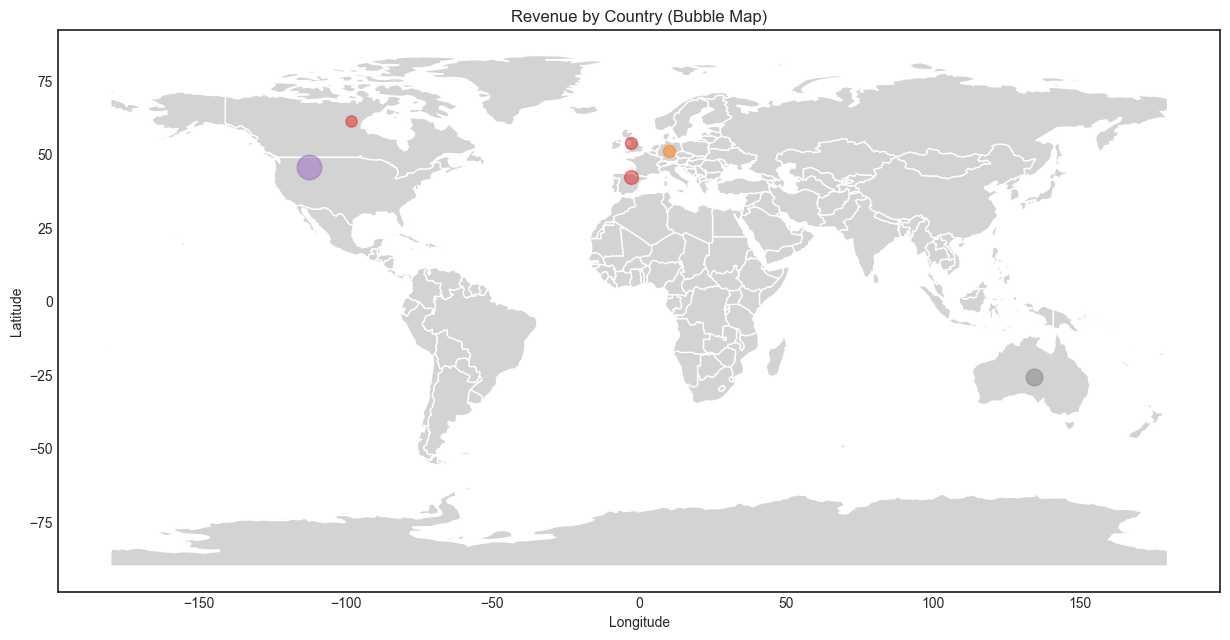

In [155]:
# Plot the map with bubble size based on revenue
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
# Plot countries
merged_data.plot(ax=ax, color='lightgrey')
# Plot bubbles with size based on revenue
for idx, row in merged_data.iterrows():
    size = row['TotalRevenue'] / 100000  # Adjust scaling factor as needed
    ax.scatter(row.geometry.centroid.x, row.geometry.centroid.y, s=size, alpha=0.5)
plt.title('Revenue by Country (Bubble Map)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

#### Q4: What is the relationship between sick leave and Job Title (PersonType)?


In [156]:
# Create Query 
sql_query="""
SELECT E.BusinessEntityID, E.JobTitle, P.PersonType, E.SickLeaveHours, S.Name as ShiftName
FROM 
	HumanResources.Employee AS E
INNER JOIN 
	Person.Person AS P ON E.BusinessEntityID=P.BusinessEntityID
INNER JOIN 
	HumanResources.EmployeeDepartmentHistory AS EDH ON E.BusinessEntityID=EDH.BusinessEntityID
INNER JOIN 
	HumanResources.Shift AS s ON EDH.ShiftID=S.ShiftID
INNER JOIN 
	HumanResources.Department AS D ON EDH.DepartmentID=D.DepartmentID;
"""
# Get Data
employee_info = pd.read_sql(sql_query, conn)
employee_info['PersonType'] = employee_info['PersonType'].replace({'EM': 'Employee', 'SP': 'Salesperson'})

C:\Users\Zaid\AppData\Local\Temp\ipykernel_26788\1459101543.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  employee_info = pd.read_sql(sql_query, conn)


In [157]:
employee_info.head()

,BusinessEntityID,JobTitle,PersonType,SickLeaveHours,ShiftName
0,23,Marketing Specialist,Employee,43,Day
1,24,Marketing Specialist,Employee,43,Day
2,25,Vice President of Production,Employee,52,Day
3,26,Production Control Manager,Employee,41,Day
4,27,Production Supervisor - WC60,Employee,60,Day


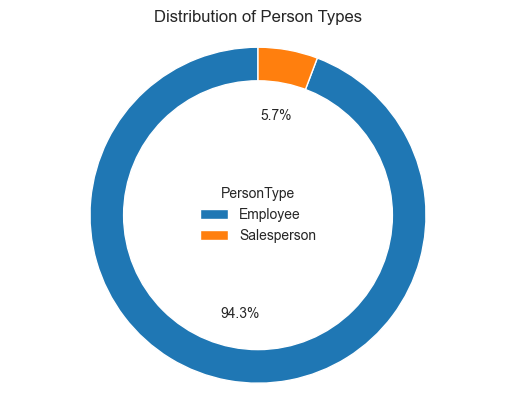

In [158]:
person_type_counts=employee_info["PersonType"].value_counts()
# Create a donut chart
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(person_type_counts, labels=None, autopct='%1.1f%%', startangle=90)
# Draw a circle at the center of the donut chart to make it a donut
centre_circle = plt.Circle((0,0),0.80,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')
# Add legend with labels
plt.legend(wedges, person_type_counts.index, title="PersonType", loc="center")
# Title of the chart
plt.title('Distribution of Person Types')
# Show the plot
plt.show()

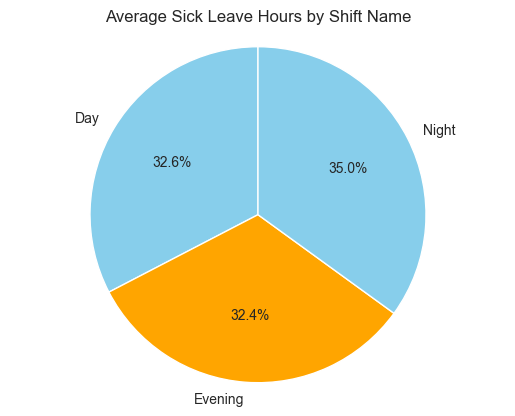

In [159]:
# Calculate average SickLeaveHours for each ShiftName
average_sick_leave = employee_info.groupby('ShiftName')['SickLeaveHours'].mean()
# Create a pie chart
plt.pie(average_sick_leave, labels=average_sick_leave.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'orange'])
plt.title('Average Sick Leave Hours by Shift Name')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

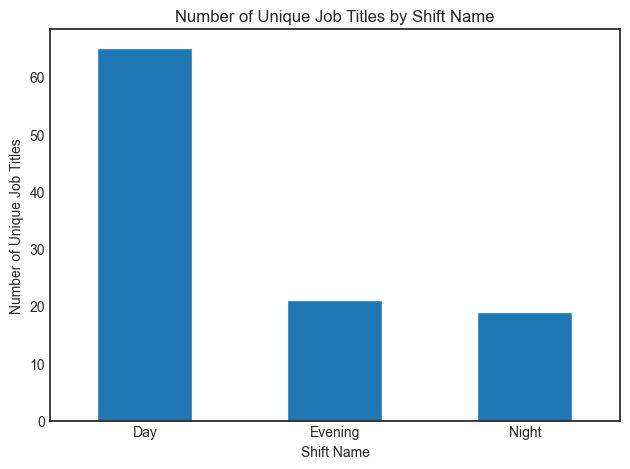

In [160]:
# Calculate number of unique job titles for each ShiftName
unique_job_titles = employee_info.groupby('ShiftName')['JobTitle'].nunique()
# Create a bar chart
unique_job_titles.plot(kind='bar')
plt.xlabel('Shift Name')
plt.ylabel('Number of Unique Job Titles')
plt.title('Number of Unique Job Titles by Shift Name')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [161]:
SickLeaveHours_describe=employee_info[["PersonType", "ShiftName", "SickLeaveHours"]].groupby(["PersonType", "ShiftName"])["SickLeaveHours"].describe()
SickLeaveHours_describe

count       mean        std   min    25%   50%    75%  \
PersonType  ShiftName                                                          
Employee    Day        165.0  45.896970  14.486589  20.0  34.00  47.0  57.00   
            Evening     62.0  44.483871  15.530765  20.0  33.00  46.0  59.00   
            Night       52.0  48.038462  14.707556  24.0  37.75  53.0  61.25   
Salesperson Day         17.0  34.117647   3.620814  27.0  31.00  34.0  37.00   

                        max  
PersonType  ShiftName        
Employee    Day        80.0  
            Evening    68.0  
            Night      69.0  
Salesperson Day        39.0

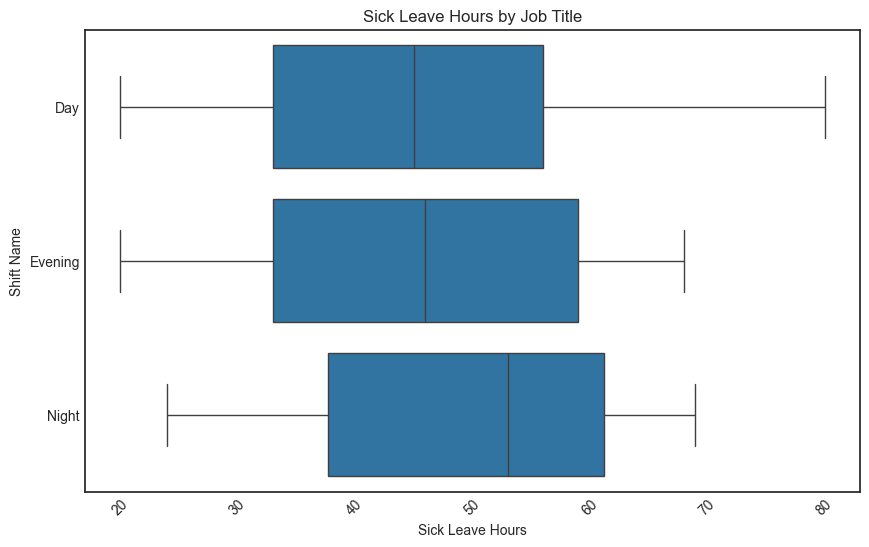

In [162]:
# Grouping data by job title and calculating mean sick leave hours
mean_sick_leave = employee_info.groupby('ShiftName')['SickLeaveHours'].mean()
sorted_groups = mean_sick_leave.sort_values(ascending=False)

# Data visualization (box plot)
plt.figure(figsize=(10, 6))
sns.boxplot(y='ShiftName', x='SickLeaveHours', data=employee_info, orient='h')
plt.title('Sick Leave Hours by Job Title')
plt.ylabel('Shift Name')
plt.xlabel('Sick Leave Hours')
plt.xticks(rotation=45)
plt.show()

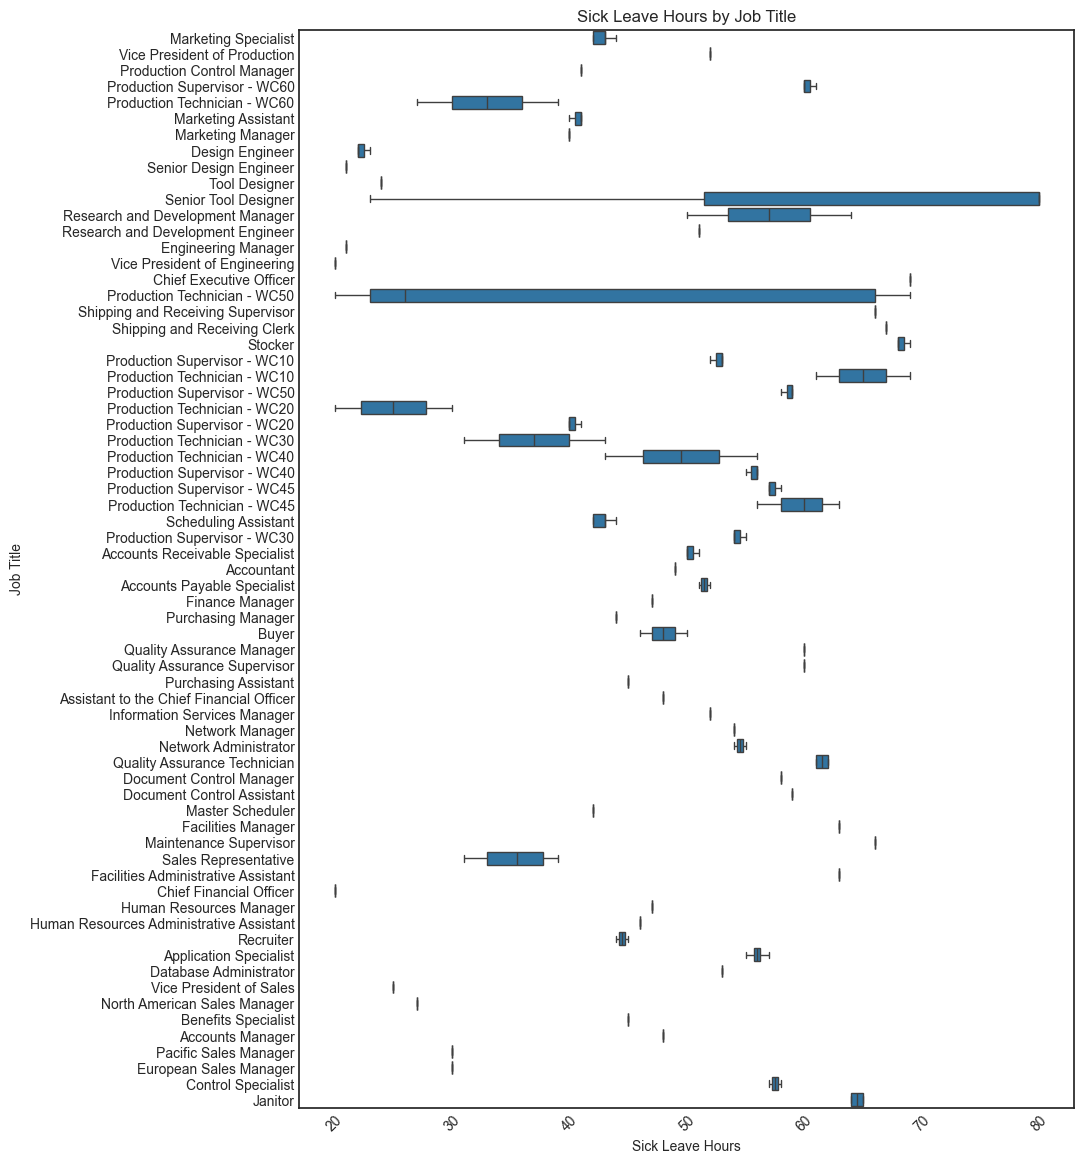

In [163]:
# Grouping data by job title and calculating mean sick leave hours
mean_sick_leave = employee_info.groupby('JobTitle')['SickLeaveHours'].mean()
sorted_groups = mean_sick_leave.sort_values(ascending=False)

# Data visualization (box plot)
plt.figure(figsize=(10, 14))
sns.boxplot(y='JobTitle', x='SickLeaveHours', data=employee_info, orient='h')
plt.title('Sick Leave Hours by Job Title')
plt.ylabel('Job Title')
plt.xlabel('Sick Leave Hours')
plt.xticks(rotation=45)
plt.show()

In [164]:

# Subset data for job titles with night shift and without night shift
night_shift = employee_info[employee_info['ShiftName'] == 'Night']
no_night_shift = employee_info[employee_info['ShiftName'] != 'Night']
# Perform independent samples t-test
t_statistic, p_value = ttest_ind(night_shift['SickLeaveHours'], no_night_shift['SickLeaveHours'])
# Print test results
print("t-statistic:", t_statistic)
print("p-value:", p_value)
# Compare p-value to significance level (e.g., 0.05)
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in sick leave hours between job titles with and without a night shift.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in sick leave hours between job titles with and without a night shift.")


t-statistic: 1.491187351783244
p-value: 0.13698445626133265
Fail to reject the null hypothesis: There is no significant difference in sick leave hours between job titles with and without a night shift.


In [165]:
# Extract sick leave hours for each job title
job_titles = employee_info['JobTitle'].unique()
sick_leave_hours_by_job_title = [employee_info[employee_info['JobTitle'] == title]['SickLeaveHours'] for title in job_titles]

# Perform Kruskal-Wallis test
h_statistic, p_value = kruskal(*sick_leave_hours_by_job_title)

# Print test results
print("H-statistic:", h_statistic)
print("p-value:", p_value)

# Compare p-value to significance level (e.g., 0.05)
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in sick leave hours among different job titles.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in sick leave hours among different job titles.")


H-statistic: 223.1493487845637
p-value: 6.170736346814304e-19
Reject the null hypothesis: There is a significant difference in sick leave hours among different job titles.


#### Q5: What is the relationship between store trading duration and revenue?


In [166]:
# Create Query 
sql_query="""SELECT * FROM Sales.vStoreWithDemographics ORDER BY YearOpened;"""
# Get Data
StoreWithDemographics = pd.read_sql(sql_query, conn)
StoreWithDemographics = StoreWithDemographics.sort_values(["Name","YearOpened"])

C:\Users\Zaid\AppData\Local\Temp\ipykernel_26788\3048243108.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  StoreWithDemographics = pd.read_sql(sql_query, conn)


In [167]:
StoreWithDemographics

,BusinessEntityID,Name,AnnualSales,AnnualRevenue,BankName,BusinessType,YearOpened,Specialty,SquareFeet,Brands,Internet,NumberEmployees
90,2051,A Bicycle Association,800000.0,80000.0,International Security,BM,1975,Touring,19000,2,T1,18
3,934,A Bike Store,300000.0,30000.0,International Bank,BM,1970,Road,7000,AW,T1,2
682,1922,A Cycle Shop,800000.0,80000.0,United Security,BM,2000,Touring,22000,3,T2,17
24,1148,A Great Bicycle Company,1000000.0,100000.0,Reserve Security,BS,1971,Road,28000,3,T2,28
260,1934,A Typical Bike Shop,300000.0,30000.0,Reserve Security,BM,1982,Road,8000,AW,T1,8
...,...,...,...,...,...,...,...,...,...,...,...,...
577,1994,World of Bikes,800000.0,80000.0,Primary Bank & Reserve,BM,1997,Mountain,19000,4+,T1,17
366,326,Worthwhile Activity Store,300000.0,30000.0,United Security,BM,1987,Mountain,8000,2,DSL,7
184,964,Year-Round Sports,3000000.0,300000.0,United Security,OS,1979,Mountain,75000,4+,DSL,66
694,1374,Yellow Bicycle Company,1000000.0,100000.0,International Security,BS,2001,Mountain,26000,4+,T1,29


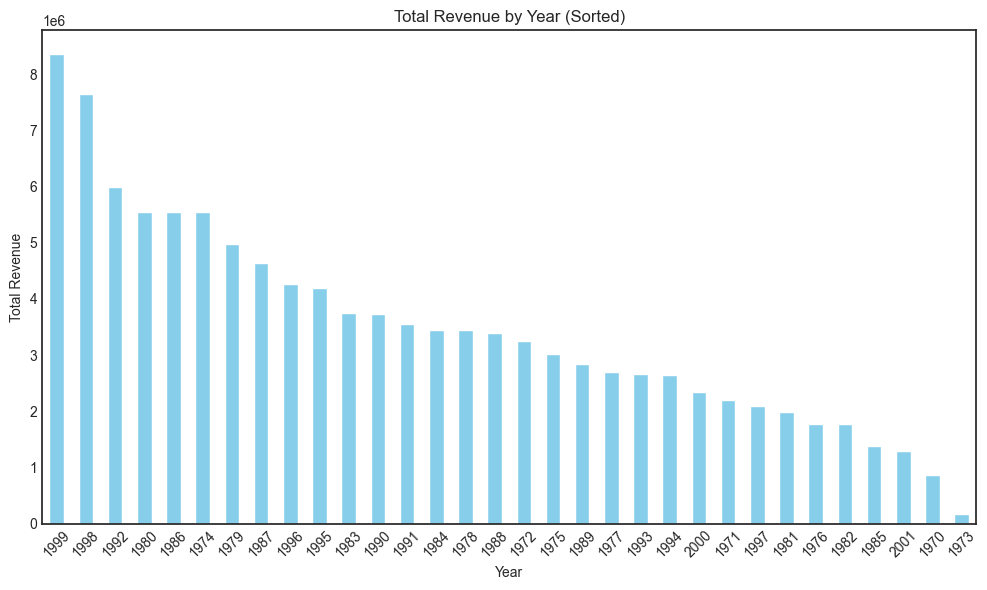

In [168]:

# Group data by YearOpened and sum the AnnualRevenue for each year
total_revenue_per_year = StoreWithDemographics.groupby('YearOpened')['AnnualRevenue'].sum()

# Sort total revenue values in descending order
total_revenue_per_year_sorted = total_revenue_per_year.sort_values(ascending=False)

# Visualize the total revenue for each year (sorted)
plt.figure(figsize=(10, 6))
total_revenue_per_year_sorted.plot(kind='bar', color='skyblue')
plt.title('Total Revenue by Year (Sorted)')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [169]:
StoreWithDemographics[["BusinessEntityID", "Name", "YearOpened", "AnnualSales", "BusinessType"]].sample(5)

,BusinessEntityID,Name,YearOpened,AnnualSales,BusinessType
486,1964,Extended Tours,1992,3000000.0,OS
77,772,Professional Sporting Goods,1974,3000000.0,OS
153,352,Tiny Bike Boutique,1978,300000.0,BM
149,500,Toy Manufacturing Inc,1977,1500000.0,BS
150,478,Golf and Cycle Store,1978,3000000.0,OS


In [170]:
StoreWithDemographics["AnnualRevenue"].describe()

count       701.000000
mean     158473.609130
std       98095.192556
min       30000.000000
25%       80000.000000
50%      150000.000000
75%      300000.000000
max      300000.000000
Name: AnnualRevenue, dtype: float64

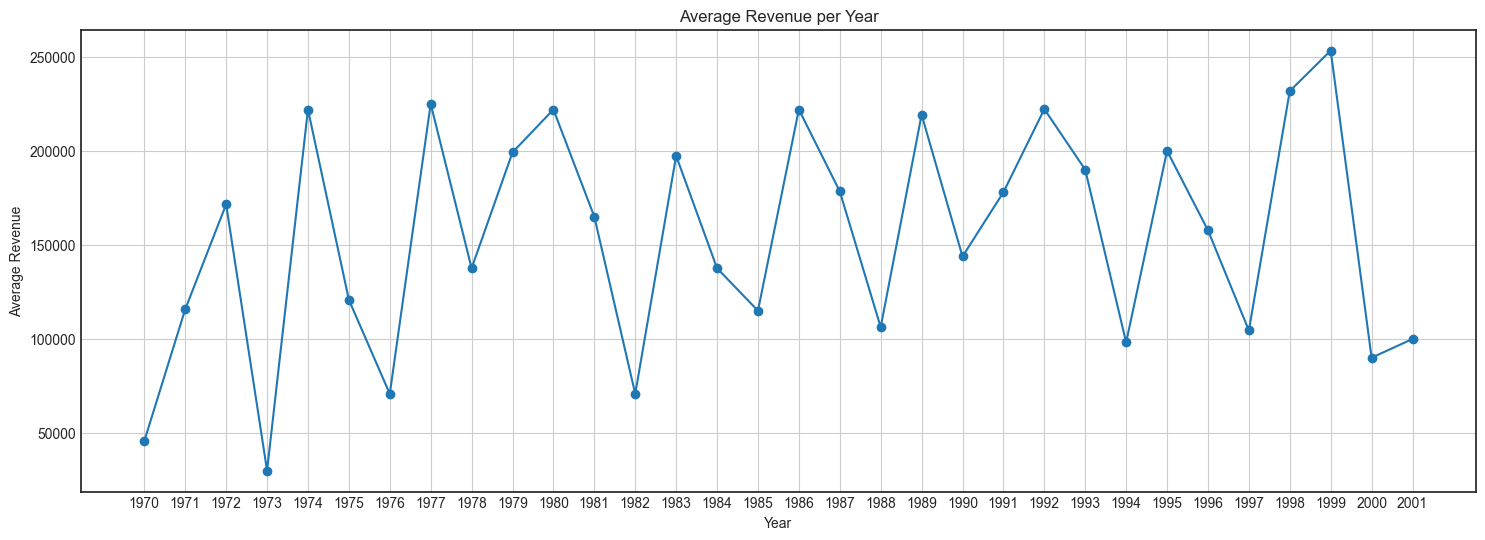

In [171]:
# Group data by YearOpened and calculate average revenue for each year
average_revenue_per_year = StoreWithDemographics.groupby('YearOpened')['AnnualRevenue'].mean()

# Plot the line chart
plt.figure(figsize=(18, 6))
plt.plot(average_revenue_per_year.index, average_revenue_per_year.values, marker='o', linestyle='-')
plt.title('Average Revenue per Year')
plt.xlabel('Year')
plt.ylabel('Average Revenue')
plt.grid(True)
plt.xticks(average_revenue_per_year.index)  # Set x-ticks to years
plt.show()

In [172]:
StoreWithDemographics["Business_age"]=2014 - StoreWithDemographics["YearOpened"]
# Define a dictionary to map abbreviations to clear names
type_mapping = {
    'BM': 'Business Model(BM)',
    'BS': 'Business Services(BS)',
    'OS': 'Online Store(OS)',
    # Add more mappings as needed
}
# Replace abbreviations with clear names
StoreWithDemographics['BusinessType'] = StoreWithDemographics['BusinessType'].replace(type_mapping)
   

In [173]:

# Calculate Pearson correlation coefficient
correlation_coefficient = np.corrcoef(StoreWithDemographics["AnnualRevenue"], StoreWithDemographics["Business_age"])[0, 1]
print("Pearson correlation coefficient: ",colored(f"{correlation_coefficient}", "yellow"))


Pearson correlation coefficient:  -0.13364477783000062


In [174]:
YearOpened = StoreWithDemographics["YearOpened"]
AnnualRevenue = StoreWithDemographics["AnnualRevenue"]
# Reshape data for regression analysis
YearOpened = YearOpened.values.reshape(-1, 1)  # Convert to numpy array and reshape
AnnualRevenue = AnnualRevenue.values  # Convert to numpy array
# Perform linear regression
regression_model = LinearRegression().fit(YearOpened, AnnualRevenue)
# Get slope and intercept
slope = regression_model.coef_[0]
intercept = regression_model.intercept_
print("Slope:", colored(slope,'green'))

Slope: 1435.6947295351872


Slope (1435.6947295351908):

-The slope indicates the change in annual revenue for a one-unit change in the year opened (YearOpened).
-In this case, for every one-unit increase in the YearOpened (which could represent a year), the annual revenue is expected to increase by approximately $1435.69.
-This suggests a positive relationship between the year a store opened and its annual revenue, indicating that newer stores tend to have higher annual revenues.

In [184]:
total_revenue_per_year = StoreWithDemographics.groupby('Business_age')['AnnualRevenue'].sum()

Business_age
13    1300000.0
14    2340000.0
15    8360000.0
16    7650000.0
17    2090000.0
18    4260000.0
19    4200000.0
20    2650000.0
21    2660000.0
22    6000000.0
23    3560000.0
24    3740000.0
25    2850000.0
26    3400000.0
27    4640000.0
28    5550000.0
29    1380000.0
30    3440000.0
31    3750000.0
32    1770000.0
33    1980000.0
34    5550000.0
35    4980000.0
36    3440000.0
37    2700000.0
38    1770000.0
39    3020000.0
40    5550000.0
41     180000.0
42    3260000.0
43    2200000.0
44     870000.0
Name: AnnualRevenue, dtype: float64

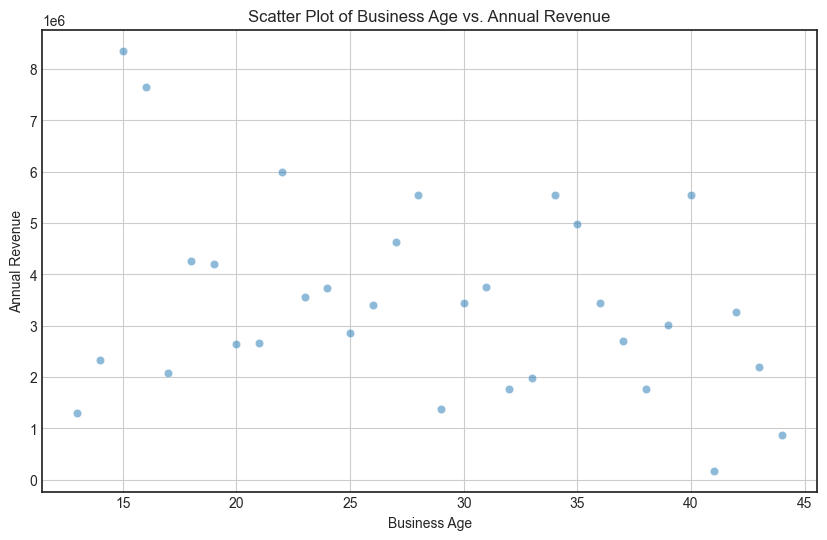

In [190]:
# Create scatter plot with hue (color) based on 'BusinessType'
plt.figure(figsize=(10, 6))
sns.scatterplot(x=total_revenue_per_year.index, y=total_revenue_per_year.values, alpha=0.5)
plt.title('Scatter Plot of Business Age vs. Annual Revenue')
plt.xlabel('Business Age')
plt.ylabel('Annual Revenue')
plt.grid(True)
plt.show()

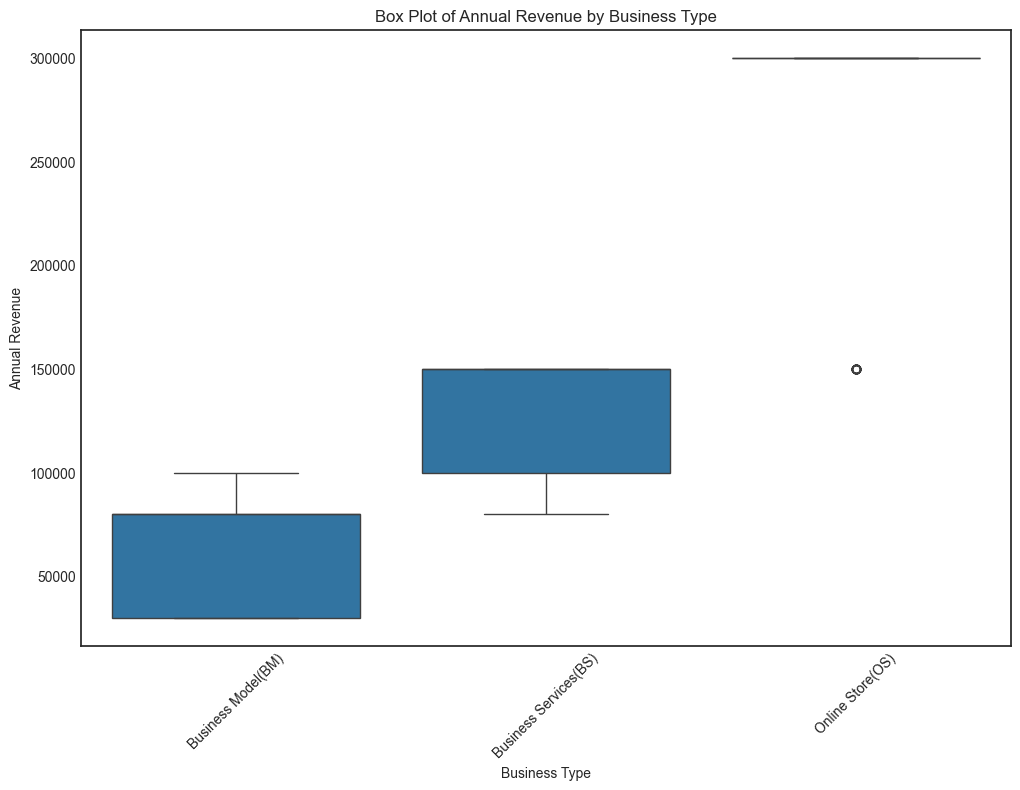

In [176]:
# Set the size of the plot
plt.figure(figsize=(12, 8))
# Create a box plot
sns.boxplot(x='BusinessType', y='AnnualRevenue', data=StoreWithDemographics)
# Set plot title and labels
plt.title('Box Plot of Annual Revenue by Business Type')
plt.xlabel('Business Type')
plt.ylabel('Annual Revenue')
# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=45)
# Show the plot
plt.show()

#### Q6: What is the relationship between the size of the stores, number of employees and revenue?

